In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [19]:
df=pd.read_csv("data_jobs.csv")

In [20]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

# Data Cleaning

In [22]:
df.drop_duplicates(inplace=True)
df.dropna(how='all',inplace=True)
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)
df['job_type_skills']=df['job_type_skills'].apply(lambda type_skills : ast.literal_eval(type_skills) if pd.notna(type_skills) else type_skills)

# The Top Job Titles Analysis

In [32]:
# Calculate the frequencies of top 10 Job titles
job_title_count = df['job_title_short'].value_counts().reset_index()
job_title_count.columns = ['job_title_short', 'count']

job_title_count


,job_title_short,count
0,Data Analyst,196050
1,Data Engineer,186216
2,Data Scientist,172263
3,Business Analyst,49053
4,Software Engineer,44918
5,Senior Data Engineer,44561
6,Senior Data Scientist,36955
7,Senior Data Analyst,29214
8,Machine Learning Engineer,14079
9,Cloud Engineer,12331


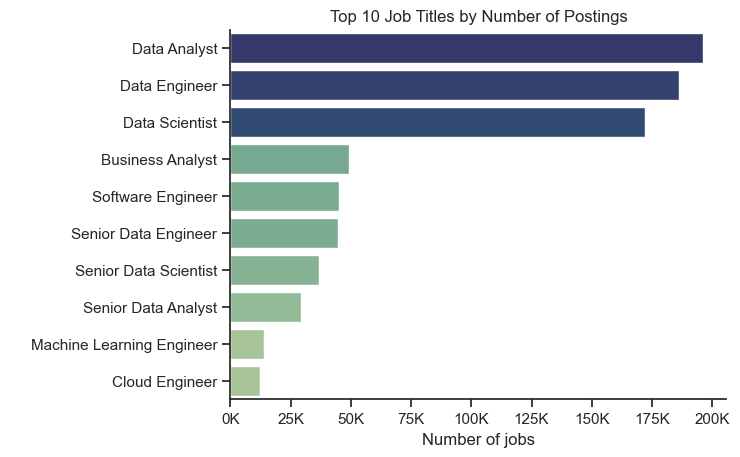

In [43]:
# Visualize the top 10 job titles
sns.set_theme(style='ticks')
palette = sns.color_palette("crest", as_cmap=True)
sns.barplot(data=job_title_count,x='count',y='job_title_short',hue='count', palette=palette, legend=False)
sns.despine()
plt.title("Top 10 Job Titles by Number of Postings")
plt.ylabel(" ")
plt.xlabel("Number of jobs")
ticks_x = plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)


# The Top Countries Analysis

In [35]:
# Calculate the frequencies of top 10 countries
Country_count=df['job_country'].value_counts().reset_index().head(10)
Country_count.columns = ['job_country', 'count']

Country_count

,job_country,count
0,United States,206287
1,India,51080
2,United Kingdom,40374
3,France,39919
4,Germany,27693
5,Spain,25099
6,Singapore,23693
7,Sudan,21780
8,Netherlands,20629
9,Italy,17012


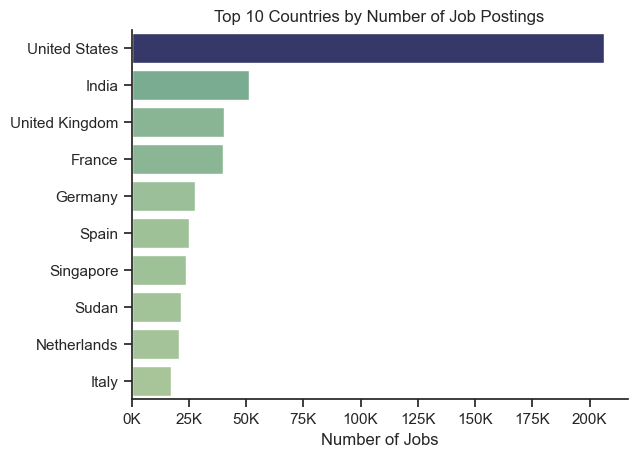

In [44]:
# Visualize the top 10 countries
sns.set_theme(style='ticks')
pallete = sns.color_palette("crest", as_cmap=True)
sns.barplot(data=Country_count, x='count', y='job_country', hue='count', palette=pallete, legend=False)
sns.despine()
plt.title('Top 10 Countries by Number of Job Postings')
plt.xlabel('Number of Jobs')
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

# The Top Companies Analysis

In [37]:
# Calculate the frequencies of top 10 companies
Company_count = df['company_name'].value_counts().reset_index().head(10)
Company_count.columns = ['company_name','count']

Company_count

,company_name,count
0,Emprego,6658
1,Booz Allen Hamilton,2879
2,Dice,2827
3,Harnham,2546
4,Insight Global,2254
5,Citi,2164
6,Confidenziale,2040
7,Listopro,1978
8,Capital One,1946
9,Robert Half,1862


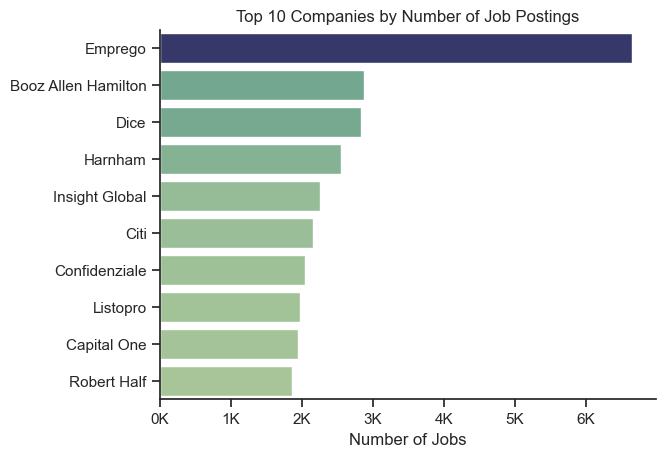

In [45]:
# Visualize the top 10 companies
sns.set_theme(style='ticks')
pallete = sns.color_palette("crest", as_cmap=True)
sns.barplot(data=Company_count, x='count', y='company_name', hue='count', palette=pallete, legend=False)
sns.despine()
plt.title('Top 10 Companies by Number of Job Postings')
plt.xlabel('Number of Jobs')
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

# Top Job Source Analysis

In [40]:
# Calculate the frequencies of top 6 job source
job_via_counts = df['job_via'].value_counts().reset_index().head(6)
job_via_counts.columns = ['job_via','count']

job_via_counts


,job_via,count
0,via LinkedIn,186658
1,via BeBee,103500
2,via Trabajo.org,61545
3,via Indeed,42748
4,via Recruit.net,23646
5,via ZipRecruiter,15533


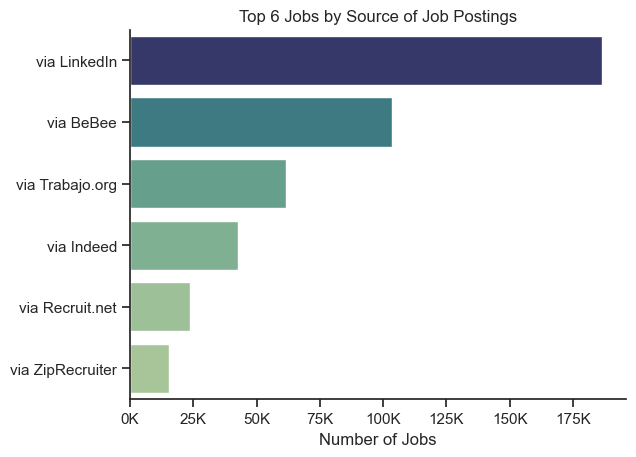

In [46]:
# Visualize the top 6 job source
sns.set_theme(style='ticks')
pallete = sns.color_palette("crest", as_cmap=True)
sns.barplot(data=job_via_counts,x='count',y='job_via',hue='count',palette=pallete, legend=False)
sns.despine()
plt.title("Top 6 Jobs by Source of Job Postings")
plt.xlabel('Number of Jobs')
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)


# Job Opportunities

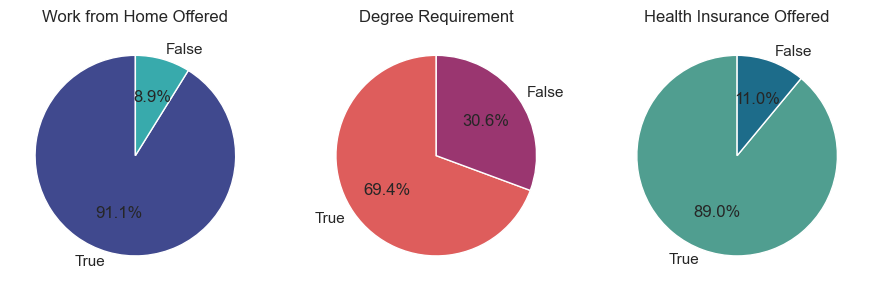

In [31]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

palettes = [
    sns.color_palette("mako", 2),
    sns.color_palette("flare", 2),
    sns.color_palette("crest", 2)
]

fig , ax=plt.subplots(1,3,figsize=(11, 3.5))
for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),labels=['True','False'],autopct='%1.1f%%', startangle=90,colors=palettes[i])
    ax[i].set_title(title)